In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import os
import pickle
import pydotplus
import matplotlib.image as pltimg
import matplotlib.pyplot as plt

In [23]:
# Read the CSV file
train = pd.read_csv("train_3.csv", delimiter=";")

x_train = train.drop('czy_zebrac',axis=1)
y_train = train['czy_zebrac']

d_tree = DecisionTreeClassifier()
d_tree = d_tree.fit(x_train,y_train)

pickle.dump(d_tree, open(os.path.join('.','tree.plk'),'wb'))
data = tree.export_graphviz(d_tree, out_file=None, feature_names=['Wzrost','wilgotnosc','dni_od_nawiezienia','aktualna_pogoda','czy_roslina_robaczywa','paliwo','pojemnosc_ekwipunku','cena_sprzedarzy'])
graph = pydotplus.graph_from_dot_data(data)


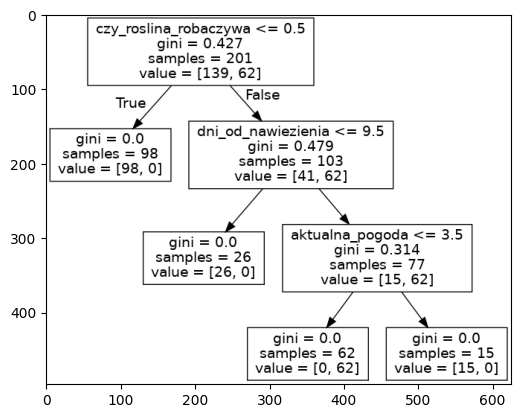

In [24]:
# Save the graph as a PNG image in the script's folder
graph.write_png(os.path.join('.', 'mytree.png'))

# Read the PNG image
img = pltimg.imread(os.path.join('.', 'mytree.png'))

# Display the image
imgplot = plt.imshow(img)
plt.show()
